# Avacado Project

Problem Statement:
Avocado is a fruit consumed by people heavily in the United States. 

Content
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

Date - The date of the observation
AveragePrice - the average price of a single avocado
type - conventional or organic
year - the year
Region - the city or region of the observation
Total Volume - Total number of avocados sold
4046 - Total number of avocados with PLU 4046 sold
4225 - Total number of avocados with PLU 4225 sold
4770 - Total number of avocados with PLU 4770 sold


Inspiration /Label 

The dataset can be seen in two angles to find the region and find the average price .

Task: One of Classification and other of Regression

Do both tasks in the same .ipynb file and submit at single file. 

In [1]:
#import all the required libraries
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,plot_roc_curve
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import dataframe
df = pd.read_excel("avocado.xlsx")
df.head()


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
# to check number of rows and columns
df.shape

(18249, 14)

In [4]:
# to check column names
df.columns.tolist()

['Unnamed: 0',
 'Date',
 'AveragePrice',
 'Total Volume',
 4046,
 4225,
 4770,
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'XLarge Bags',
 'type',
 'year',
 'region']

In [5]:
# to check for null values
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [6]:
#to check for duplicate values
df.duplicated().sum()

0

In [7]:
# to drop columns which are like index, add no value to the dataset.
df.drop(['Unnamed: 0','Date'],axis=1,inplace=True)
df.head(3)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


In [8]:
# to check the shape of the dataframe after dropping 2 columns
df.shape

(18249, 12)

In [9]:
# to avoid sentific notations of the numbers which are hard to read
pd.set_option('display.float_format',lambda x : '%.3f'%x)

In [10]:
# to get statistical analysis of the data
df.describe(include ='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
AveragePrice,18249.000,NaN,NaN,NaN,1.406,0.403,0.440,1.100,1.370,1.660,3.250
Total Volume,18249.000,NaN,NaN,NaN,850644.013,3453545.355,84.560,10838.580,107376.760,432962.290,62505646.520
4046,18249.000,NaN,NaN,NaN,293008.425,1264989.082,0.000,854.070,8645.300,111020.200,22743616.170
4225,18249.000,NaN,NaN,NaN,295154.568,1204120.401,0.000,3008.780,29061.020,150206.860,20470572.610
4770,18249.000,NaN,NaN,NaN,22839.736,107464.068,0.000,0.000,184.990,6243.420,2546439.110
Total Bags,18249.000,NaN,NaN,NaN,239639.202,986242.399,0.000,5088.640,39743.830,110783.370,19373134.370
Small Bags,18249.000,NaN,NaN,NaN,182194.687,746178.515,0.000,2849.420,26362.820,83337.670,13384586.800
Large Bags,18249.000,NaN,NaN,NaN,54338.088,243965.965,0.000,127.470,2647.710,22029.250,5719096.610
XLarge Bags,18249.000,NaN,NaN,NaN,3106.427,17692.895,0.000,0.000,0.000,132.500,551693.650
type,18249,2,conventional,9126,NaN,NaN,NaN,NaN,NaN,NaN,NaN


*there is very high variation in the mean of all the columns.

*standard deviation is also very high among many columns.

*there are 2 unique values in the "type" column and 54 in the "region" column.

*there are no null values in the dataset

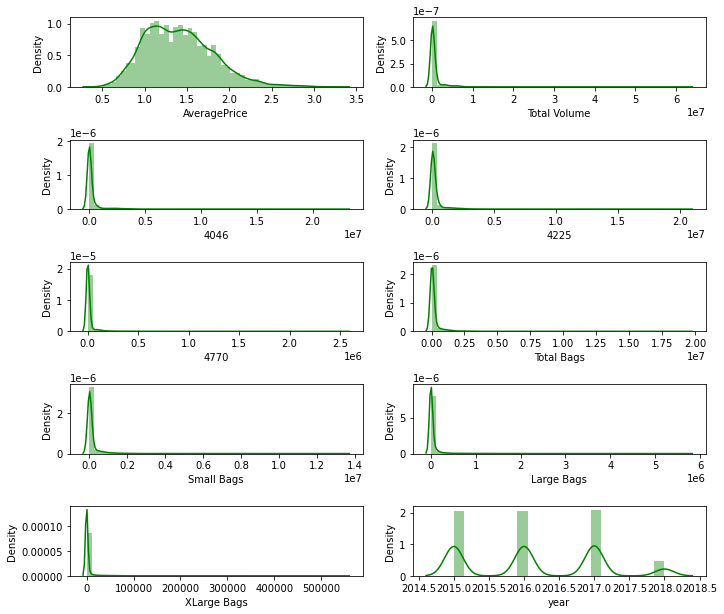

In [11]:
# to plot distplot 
columns = ['AveragePrice','Total Volume',4046,4225,4770,'Total Bags','Small Bags','Large Bags','XLarge Bags','year']
plt.figure(figsize = (10,15))
for i in range(len(columns)):
    plt.subplot(9,2, i+1)
    sns.distplot(df[columns[i]],color = 'g');
plt.tight_layout()


*AveragePrice is near to normal distribution with right tails, means skewness towards right or positive skewness.

*other than AveragePrice all other columns are highly skewd and concentration of the data is limited to certain point only.

<AxesSubplot:xlabel='type', ylabel='count'>

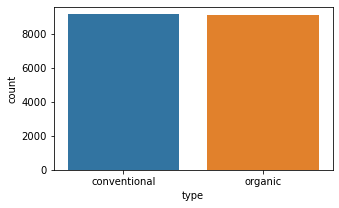

In [12]:
#to plot count plot
plt.figure(figsize=(5,3))
sns.countplot(df['type'],label='count')

'types' column has 2 unique values,namely 'conventional' and 'organic'.Both are equally distributed.

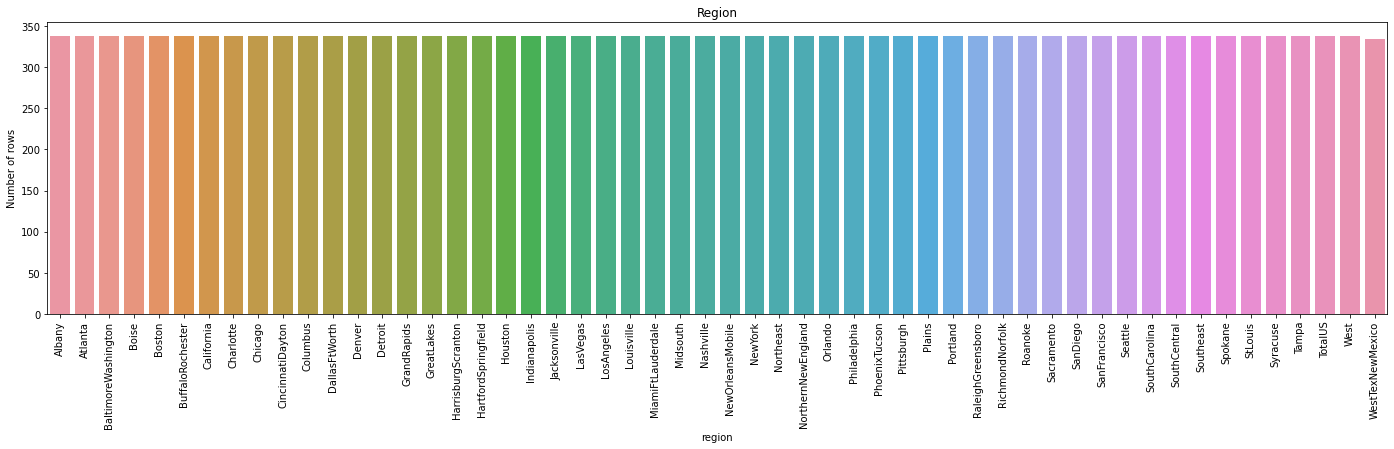

In [13]:
#to plot count plot
plt.figure(figsize=(20,5))
sns.countplot(df['region'],label='count')
plt.title('Region')
plt.tight_layout()
plt.xticks(rotation=90)
plt.ylabel("Number of rows")
plt.show()

'region' column has 54 unique values and all are equally distributed.

In [14]:
#to convert string data in to numerical
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])
df['region'] = le.fit_transform(df['region'])

In [15]:
# to check the data after conversion
df.sample()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
1628,0.990,375737.020,232502.520,56930.160,82.750,86221.590,43014.650,43206.940,0.000,0,2015,31


In [16]:
# copy the data
df1 = df.copy()
 # since dataset is vastly spread and there is lot of variation among mean of each column,shows us the need of regularization 
# apply normalization techniques(min max)
for column in df1.columns:
    df1[column] = (df1[column] - df1[column].min()) / (df1[column].max() - df1[column].min())    
  
  #view normalized data

print(df1)

       AveragePrice  Total Volume  4046  4225  4770  Total Bags  Small Bags  \
0             0.317         0.001 0.000 0.003 0.000       0.000       0.001   
1             0.324         0.001 0.000 0.002 0.000       0.000       0.001   
2             0.174         0.002 0.000 0.005 0.000       0.000       0.001   
3             0.228         0.001 0.000 0.004 0.000       0.000       0.000   
4             0.299         0.001 0.000 0.002 0.000       0.000       0.000   
...             ...           ...   ...   ...   ...         ...         ...   
18244         0.423         0.000 0.000 0.000 0.000       0.001       0.001   
18245         0.452         0.000 0.000 0.000 0.000       0.000       0.001   
18246         0.509         0.000 0.000 0.000 0.000       0.000       0.001   
18247         0.530         0.000 0.000 0.000 0.000       0.001       0.001   
18248         0.420         0.000 0.000 0.000 0.000       0.001       0.001   

       Large Bags  XLarge Bags  type  year  region 

In [17]:
#to check dataset after regularlization
df1.head(2)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.317,0.001,0.000,0.003,0.000,0.000,0.001,0.000,0.000,0.000,0.000,0.000
1,0.324,0.001,0.000,0.002,0.000,0.000,0.001,0.000,0.000,0.000,0.000,0.000


In [18]:
# to analyse the correlation of each column
df.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
AveragePrice,1.000,-0.193,-0.208,-0.173,-0.179,-0.177,-0.175,-0.173,-0.118,0.616,0.093,-0.012
Total Volume,-0.193,1.000,0.978,0.974,0.872,0.963,0.967,0.881,0.747,-0.232,0.017,0.174
4046,-0.208,0.978,1.000,0.926,0.833,0.920,0.925,0.839,0.699,-0.226,0.003,0.192
4225,-0.173,0.974,0.926,1.000,0.888,0.906,0.916,0.810,0.689,-0.232,-0.010,0.146
4770,-0.179,0.872,0.833,0.888,1.000,0.792,0.803,0.698,0.680,-0.210,-0.037,0.095
Total Bags,-0.177,0.963,0.920,0.906,0.792,1.000,0.994,0.943,0.804,-0.218,0.072,0.175
Small Bags,-0.175,0.967,0.925,0.916,0.803,0.994,1.000,0.903,0.807,-0.221,0.064,0.165
Large Bags,-0.173,0.881,0.839,0.810,0.698,0.943,0.903,1.000,0.711,-0.193,0.088,0.199
XLarge Bags,-0.118,0.747,0.699,0.689,0.680,0.804,0.807,0.711,1.000,-0.175,0.081,0.082
type,0.616,-0.232,-0.226,-0.232,-0.210,-0.218,-0.221,-0.193,-0.175,1.000,-0.000,-0.000


<AxesSubplot:>

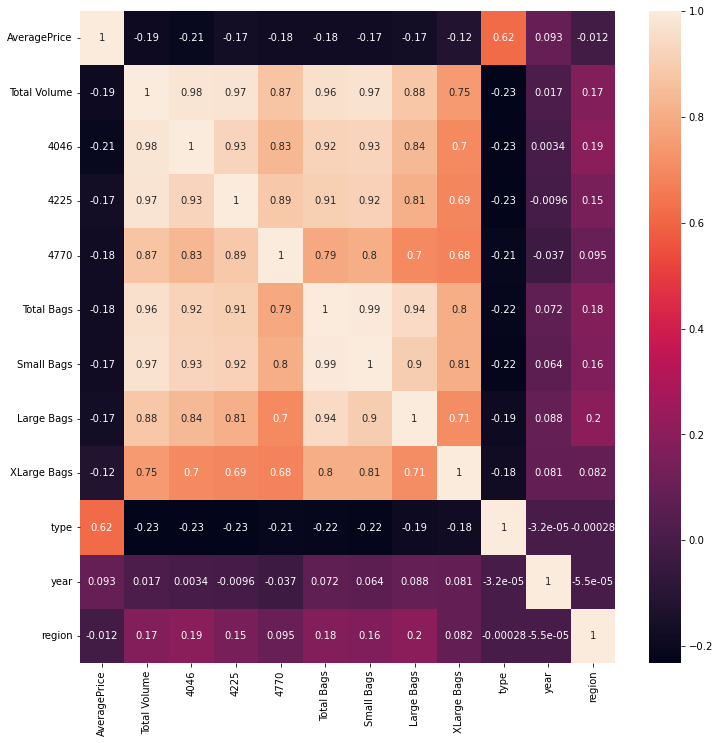

In [19]:
plt.figure(figsize=(12,12))
sns.heatmap(df1.corr(),color ='k',annot=True)

*Total Volume and Total Bags are highly correlated to many columns.

*AveragePrice is negitively correalted to all of the columns.

In [20]:
#dropping the columns with very high multicollinearity
df1.drop(['Total Bags','Total Volume'],axis=1,inplace=True)
df1.head(3)

,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.317,0.000,0.003,0.000,0.001,0.000,0.000,0.000,0.000,0.000
1,0.324,0.000,0.002,0.000,0.001,0.000,0.000,0.000,0.000,0.000
2,0.174,0.000,0.005,0.000,0.001,0.000,0.000,0.000,0.000,0.000


In [21]:
# to check skewness in the data
df1.skew()

AveragePrice    0.580
4046            8.648
4225            8.942
4770           10.159
Small Bags      9.541
Large Bags      9.796
XLarge Bags    13.140
type            0.000
year            0.215
region          0.000
dtype: float64

In [22]:
#to remove the skewness in the dataset
from sklearn.preprocessing import power_transform
df_new = power_transform(df1)

In [23]:
#creating new dataset after removing skewness and saving it to 'df'
df = pd.DataFrame(df_new , columns = df1.columns)
df.head(3)


,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region
0,-0.088,-0.643,-0.278,-0.571,-0.670,-0.665,-0.462,-1.000,-1.286,-1.752
1,-0.036,-0.646,-0.357,-0.570,-0.657,-0.665,-0.462,-1.000,-1.286,-1.752
2,-1.276,-0.645,0.126,-0.561,-0.678,-0.665,-0.462,-1.000,-1.286,-1.752


In [24]:
# to checking dataset afterremoving skewness
df.skew()

AveragePrice    0.013
4046            1.618
4225            1.384
4770            1.795
Small Bags      1.428
Large Bags      1.555
XLarge Bags     2.156
type            0.000
year           -0.016
region         -0.060
dtype: float64

skewness is not completely removed but drastically reduced.

<AxesSubplot:>

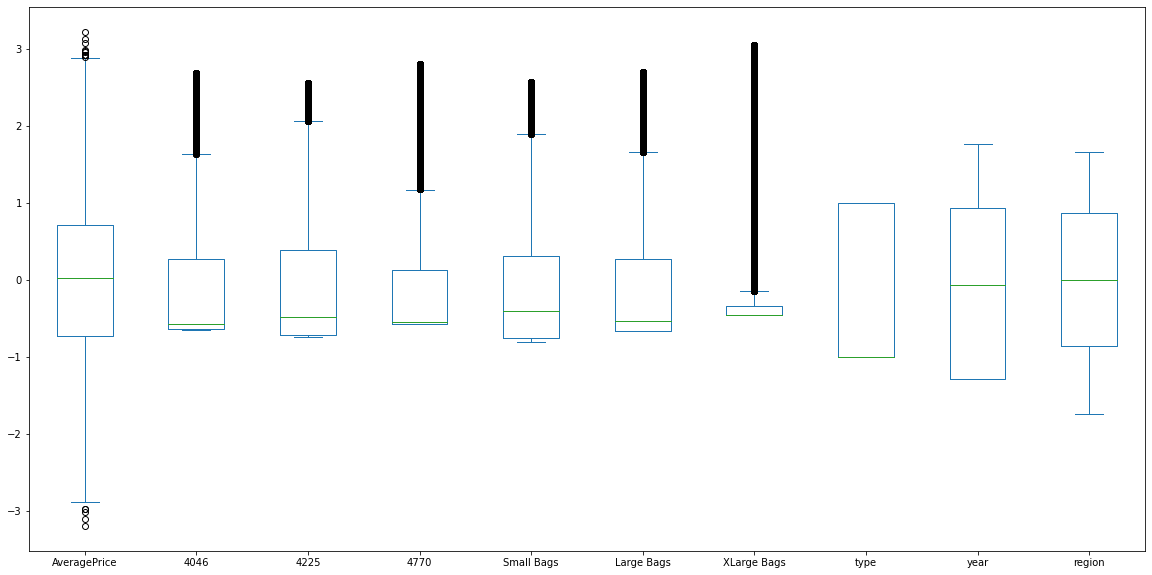

In [25]:
# to find out outliers in the dataset
df.plot(kind='box',figsize=(20,10))

from the above plot we can analyse that there are many outliers present in the data.

In [26]:
#to check for outliers through zscore 
from scipy.stats import zscore
(np.abs(zscore(df)) < 3).all()

AveragePrice    False
4046             True
4225             True
4770             True
Small Bags       True
Large Bags       True
XLarge Bags     False
type             True
year             True
region           True
dtype: bool

In [27]:
#to remove outliers in data set through zscore
z = np.abs(zscore(df))
z.shape

(18249, 10)

In [28]:
threshold = 3
print(np.where(z>3))

(array([  573,   679,   683,   684,   690,   691,   695,   716,   719,
         723,   780,   781,   782,   783,   784,   785,   787,   788,
         789,   790,   791,   792,   793,   794,   795,   796,   797,
         798,   799,   800,   801,   802,   803,   805,   807,   809,
         812,   815,   816,   820,   823,   827,   936,   937,  2340,
        2341,  2652,  2653,  2654,  2655,  2656,  2657,  2658,  2659,
        2660,  2661,  2662,  2663,  2664,  2665,  2666,  2667,  2668,
        2669,  2670,  2671,  2672,  2673,  2674,  2675,  2676,  2677,
        2678,  2679,  2680,  2681,  2682,  2683,  2684,  2686,  2687,
        2688,  2690,  2692,  2694,  2695,  2699,  2703,  2757,  3120,
        3121,  3122,  3123,  3124,  3125,  3126,  3127,  3128,  3129,
        3130,  3131,  3132,  3133,  3134,  3135,  3136,  3137,  3138,
        3139,  3140,  3141,  3142,  3143,  3144,  3145,  3146,  3147,
        3148,  3149,  3150,  3151,  3152,  3153,  3154,  3155,  3156,
        3157,  3158

In [29]:
df_new = df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(18249, 10)
(17471, 10)


In [30]:
#to find % loss in data
loss = (1359-1322)/1359 * 100
print(loss)

2.7225901398086827


<AxesSubplot:>

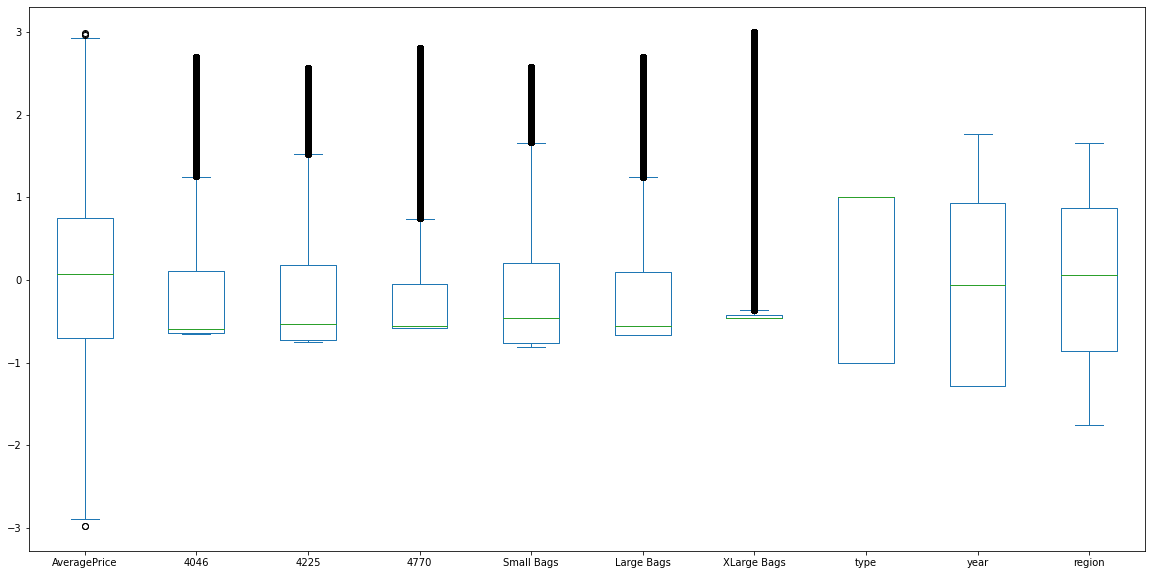

In [31]:
# to visiualize the data after removing outliers
df_new.plot(kind='box',figsize=(20,10))

In [32]:
#seperate feature variable and target variable
x = df_new.drop (['region'], axis = 1)
y = df_new['region']

In [33]:
x.columns

Index(['AveragePrice',           4046,           4225,           4770,
         'Small Bags',   'Large Bags',  'XLarge Bags',         'type',
               'year'],
      dtype='object')

In [34]:
y

0       -1.752
1       -1.752
2       -1.752
3       -1.752
4       -1.752
         ...  
18244    1.656
18245    1.656
18246    1.656
18247    1.656
18248    1.656
Name: region, Length: 17471, dtype: float64

In [35]:
#to convert y in to integer
le = LabelEncoder()
y=le.fit_transform(y)
y

array([ 0,  0,  0, ..., 53, 53, 53], dtype=int64)

In [36]:
# to predict best random state value
maxAcc =0
maxRS=0

for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=i)
    dtc = DecisionTreeClassifier()
    dtc.fit(x_train,y_train)
    predrf = dtc.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print('Best accuracy is',maxAcc,'on Random_State',maxRS)

Best accuracy is 0.8068669527896996 on Random_State 9


In [37]:
#build a SVC model
svc=SVC()
svc.fit(x_train,y_train)
predlr = svc.predict(x_test)
print('accuracy',accuracy_score(y_test, predlr)*100)
print(confusion_matrix(y_test, predlr))
print(classification_report(y_test,predlr))

accuracy 55.53648068669528
[[37  0  0 ...  0  0  0]
 [10 24  0 ...  0  0  0]
 [ 1  0 28 ...  0  0  0]
 ...
 [ 0  0  0 ... 38  0  0]
 [ 0  0  0 ...  0 55  0]
 [ 3  0  0 ...  0  0 26]]
              precision    recall  f1-score   support

           0       0.13      0.54      0.21        69
           1       0.77      0.41      0.54        58
           2       0.93      0.47      0.63        59
           3       0.95      0.52      0.67        71
           4       0.85      0.62      0.72        71
           5       0.83      0.34      0.49        73
           6       0.95      0.86      0.90        43
           7       0.28      0.61      0.38        66
           8       0.76      0.80      0.78        55
           9       0.57      0.54      0.55        61
          10       0.85      0.39      0.54        71
          11       0.28      0.67      0.39        61
          12       0.92      0.67      0.77        90
          13       0.86      0.36      0.51        66
      

In [38]:
#build a logistic regression classifier
LR = LogisticRegression()
LR.fit(x_train,y_train)
predlr = LR.predict(x_test)
print('accuracy',accuracy_score(y_test, predlr)*100)
print(confusion_matrix(y_test, predlr))
print(classification_report(y_test,predlr))

accuracy 44.92131616595136
[[43  0  0 ...  0  0  0]
 [ 2 14  0 ...  0  0  0]
 [ 0  0 25 ...  0  0  2]
 ...
 [ 0  0  0 ... 33  5  0]
 [ 0  0  0 ...  0 52  0]
 [ 0  5  0 ...  0  0 19]]
              precision    recall  f1-score   support

           0       0.36      0.62      0.46        69
           1       0.28      0.24      0.26        58
           2       0.61      0.42      0.50        59
           3       0.16      0.46      0.23        71
           4       0.67      0.54      0.59        71
           5       0.33      0.32      0.32        73
           6       0.73      0.81      0.77        43
           7       0.28      0.48      0.36        66
           8       0.62      0.85      0.72        55
           9       0.38      0.51      0.44        61
          10       0.75      0.21      0.33        71
          11       0.40      0.52      0.45        61
          12       0.63      0.50      0.56        90
          13       0.82      0.27      0.41        66
      

In [39]:
# build a DecisionTreeClassifier
DT = DecisionTreeClassifier(random_state=96)
DT.fit(x_train, y_train)
predlr = DT.predict(x_test)
print('accuracy',accuracy_score(y_test, predlr)*100)
print(confusion_matrix(y_test, predlr))
print(classification_report(y_test,predlr))

accuracy 80.77253218884121
[[56  0  0 ...  0  0  0]
 [ 0 44  0 ...  0  0  0]
 [ 0  0 53 ...  0  0  2]
 ...
 [ 0  0  0 ... 38  0  0]
 [ 0  0  0 ...  0 53  0]
 [ 0  0  2 ...  0  0 44]]
              precision    recall  f1-score   support

           0       0.75      0.81      0.78        69
           1       0.66      0.76      0.70        58
           2       0.90      0.90      0.90        59
           3       0.83      0.77      0.80        71
           4       0.93      0.90      0.91        71
           5       0.72      0.70      0.71        73
           6       0.91      0.98      0.94        43
           7       0.83      0.86      0.84        66
           8       0.86      0.91      0.88        55
           9       0.75      0.77      0.76        61
          10       0.77      0.76      0.77        71
          11       0.88      0.70      0.78        61
          12       0.92      0.88      0.90        90
          13       0.77      0.71      0.74        66
      

In [40]:
#build a RandomForestClassifier
RF = RandomForestClassifier(random_state=96)
RF.fit(x_train, y_train)
predlr = RF.predict(x_test)
print('accuracy',accuracy_score(y_test, predlr)*100)
print(confusion_matrix(y_test, predlr))
print(classification_report(y_test,predlr))

accuracy 90.98712446351931
[[64  0  0 ...  0  0  0]
 [ 0 52  0 ...  0  0  0]
 [ 0  0 59 ...  0  0  0]
 ...
 [ 0  0  0 ... 38  0  0]
 [ 0  0  0 ...  0 56  0]
 [ 0  0  1 ...  0  0 52]]
              precision    recall  f1-score   support

           0       0.85      0.93      0.89        69
           1       0.74      0.90      0.81        58
           2       0.95      1.00      0.98        59
           3       0.94      0.85      0.89        71
           4       0.96      0.96      0.96        71
           5       0.87      0.81      0.84        73
           6       0.98      1.00      0.99        43
           7       0.98      0.86      0.92        66
           8       0.96      0.98      0.97        55
           9       0.95      0.90      0.92        61
          10       0.84      0.89      0.86        71
          11       0.98      0.84      0.90        61
          12       0.97      0.96      0.96        90
          13       0.85      0.88      0.87        66
      

In [41]:
#cross validation to check the accuracy score
print('cross validation score of random forest model = ', cross_val_score(RF,x,y,cv=None).mean())
print('cross validation score of logistic regression model = ', cross_val_score(LR,x,y,cv=None).mean())
print('cross validation score of desicion tree model = ', cross_val_score(DT,x,y,cv=None).mean())
print('cross validation score of standard vector machine model = ', cross_val_score(svc,x,y,cv=None).mean())

cross validation score of random forest model =  0.6882276995593509
cross validation score of logistic regression model =  0.3469083726609196
cross validation score of desicion tree model =  0.5465671705347324
cross validation score of standard vector machine model =  0.39075254288365174


In [42]:
# hyperparameter tuning with RandomForestClassifier, parameters of RandomForestClassifier
parameters ={'n_estimators':[200], 'criterion':['gini'], 
             'min_samples_split':[5], 'min_samples_leaf':[2], 
              'bootstrap':[True],'n_jobs':[-1], 'random_state':[96]}

In [43]:
# hyperparameter tuning with gridsearchCV
gcv = GridSearchCV(RandomForestClassifier(random_state=96), parameters, verbose=1, cv=10, n_jobs=-1)

In [44]:
#training the model
gcv.fit(x_train,y_train)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=96),
             n_jobs=-1,
             param_grid={'bootstrap': [True], 'criterion': ['gini'],
                         'min_samples_leaf': [2], 'min_samples_split': [5],
                         'n_estimators': [200], 'n_jobs': [-1],
                         'random_state': [96]},
             verbose=1)

In [45]:
type(gcv)

sklearn.model_selection._search.GridSearchCV

In [46]:
# finding best estimator
gcv.best_estimator_

RandomForestClassifier(min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200, n_jobs=-1, random_state=96)

In [47]:
#finding out which parameter is giving best accuracy
gcv.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 200,
 'n_jobs': -1,
 'random_state': 96}

In [48]:
# Applying the parameters to the final model
pred = gcv.best_estimator_.predict(x_test)
acc1 =accuracy_score(y_test,pred)
print(acc*100)

80.48640915593705


In [49]:
# to save the model
model=RandomForestClassifier(min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200, n_jobs=-1, random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200, n_jobs=-1, random_state=42)

In [50]:
#to save the model
import joblib
joblib.dump(model,'avacado_classification_model.pkl')

['avacado_classification_model.pkl']

# Avacado project as Regression problem

In [51]:
# To import all the required libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import (StandardScaler,
                                  PolynomialFeatures)
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from scipy.stats.mstats import normaltest
from sklearn.svm import SVR

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [52]:
df_new.head()

,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region
0,-0.088,-0.643,-0.278,-0.571,-0.670,-0.665,-0.462,-1.000,-1.286,-1.752
1,-0.036,-0.646,-0.357,-0.570,-0.657,-0.665,-0.462,-1.000,-1.286,-1.752
2,-1.276,-0.645,0.126,-0.561,-0.678,-0.665,-0.462,-1.000,-1.286,-1.752
3,-0.797,-0.642,-0.141,-0.568,-0.715,-0.663,-0.462,-1.000,-1.286,-1.752
4,-0.222,-0.644,-0.364,-0.568,-0.710,-0.660,-0.462,-1.000,-1.286,-1.752


In [53]:
#seperate feature variable and target variable
x1 = df_new.drop (['AveragePrice'], axis = 1)
y1 = df_new['AveragePrice']

In [54]:
x1.head(3)

,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region
0,-0.643,-0.278,-0.571,-0.670,-0.665,-0.462,-1.000,-1.286,-1.752
1,-0.646,-0.357,-0.570,-0.657,-0.665,-0.462,-1.000,-1.286,-1.752
2,-0.645,0.126,-0.561,-0.678,-0.665,-0.462,-1.000,-1.286,-1.752


In [55]:
y1

0       -0.088
1       -0.036
2       -1.276
3       -0.797
4       -0.222
         ...  
18244    0.643
18245    0.819
18246    1.152
18247    1.270
18248    0.620
Name: AveragePrice, Length: 17471, dtype: float64

In [56]:
# to predict best random state value
max_r2=0
maxRs=0
for i in range(0,100):
    x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.20, random_state=i)
    lr=LinearRegression()
    lr.fit(x1_train,y1_train)
    pred_train=lr.predict(x1_train)
    pred_test=lr.predict(x1_test)
    r2_score1=r2_score(y1_test,pred_test)
    if r2_score1>max_r2:
        max_r2=r2_score1
        maxRs=i
print("Best r2_score is ", max_r2,"on Random_State",maxRs)

Best r2_score is  0.5062820516455334 on Random_State 92


In [57]:
#spliting dataset into training(80%) and testing(20%)
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.20, random_state=92)

In [58]:
# to build models
lr=LinearRegression()
dtc=DecisionTreeRegressor()
svr=SVR()
rf=RandomForestRegressor()
gbr=GradientBoostingRegressor()
abr=AdaBoostRegressor()

In [59]:
model=[lr,dtc,svr,rf,gbr,abr]

for m in model:
    m.fit(x1_train,y1_train)
    pred=m.predict(x1_test)
    print('Mean Absolute error: of',m)
    mae=mean_absolute_error(y_test,pred)
    print(mae)
    print('Mean Squared error: of',m)
    mse=mean_squared_error(y1_test,pred)
    print(mse)
    print('Root Mean Squared error: of',m)
    rmse=np.sqrt(mean_squared_error(y1_test,pred))
    print(rmse)
    print('r2 score: of',m)
    r2score=r2_score(y1_test,pred)
    print(r2score)
    score=cross_val_score(m,x,y,cv=5)
    crossval=score.mean()
    print("Cross Validation Score:",crossval)
    print("Difference Between r2_score and CrossValidation Score:",abs(r2score-crossval))
    print("\n")

Mean Absolute error: of LinearRegression()
26.51926657717895
Mean Squared error: of LinearRegression()
0.48946403866704635
Root Mean Squared error: of LinearRegression()
0.6996170657345676
r2 score: of LinearRegression()
0.5062820516455334
Cross Validation Score: -0.24857853668606716
Difference Between r2_score and CrossValidation Score: 0.7548605883316006


Mean Absolute error: of DecisionTreeRegressor()
26.49823081874045
Mean Squared error: of DecisionTreeRegressor()
0.28631182794305504
Root Mean Squared error: of DecisionTreeRegressor()
0.5350811414571205
r2 score: of DecisionTreeRegressor()
0.7111998489886624
Cross Validation Score: -1.0941962674315102
Difference Between r2_score and CrossValidation Score: 1.8053961164201726


Mean Absolute error: of SVR()
26.5039253761156
Mean Squared error: of SVR()
0.3154542079246733
Root Mean Squared error: of SVR()
0.5616531028354365
r2 score: of SVR()
0.6818041939087225
Cross Validation Score: -0.5242599631603228
Difference Between r2_score a

In [60]:
#hyperparameter tuning with AdaBoostRegressor, parameters of AdaBoostRegressor
parameters = {'n_estimators':[500,1000,2000],
              'learning_rate':[.001,0.01,.1],
              'random_state':[92]}

In [61]:
# hyperparameter tuning with gridsearchCV
gcv = GridSearchCV(AdaBoostRegressor(), parameters,scoring='r2', verbose=1, cv=10, n_jobs=-1)

In [62]:
# training the model
gcv_result = gcv.fit(x1_train, y1_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


In [63]:
#finding out which parameter is giving best accuracy
gcv.best_params_

{'learning_rate': 0.1, 'n_estimators': 500, 'random_state': 92}

In [64]:
type(gcv)

sklearn.model_selection._search.GridSearchCV

In [65]:
# finding best estimator
gcv.best_estimator_

AdaBoostRegressor(learning_rate=0.1, n_estimators=500, random_state=92)

In [66]:
# Applying the parameters to the final model
pred = gcv.best_estimator_.predict(x_test)
r2score=r2_score(y_test,pred)
print(r2score)

-3.002817621282194


In [67]:
# saving the best model with parameters
model=AdaBoostRegressor(learning_rate=0.1, n_estimators=500, random_state=92)
model.fit(x_train,y_train)

AdaBoostRegressor(learning_rate=0.1, n_estimators=500, random_state=92)

In [68]:
import joblib
joblib.dump(model,'avacado_regression.pkl')

['avacado_regression.pkl']